In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.cluster import KMeans
from sklearn.feature_selection import f_classif

In this file, we will contexualize K mean clustering and demonstrate why it's necessary to reduce features

In [3]:
# load data file
data = pd.read_csv('/home/DAVIDSON/jiqian/Workspace/IS/CancerBioInfo/Data Processing/data_processed.csv')
data

,PATH_N_STAGE,M_CTNNAL1,M_C16ORF91,M_PRSS27,M_HIST1H3J,M_OAS1,M_CKS1B,M_MAP6D1,M_LOC100129935,M_GABPB2,...,M_HLA-DPB1,M_HPDL,M_ZC3H11A,M_TESPA1,M_RAB39A,M_ATG16L1,M_RNF135,M_CAPN14,M_RABL2A,M_ASB13
0,2.0,-0.7253,-0.0768,-0.0967,-0.6287,-0.1719,-0.5324,-0.0323,-0.0489,-0.5993,...,-0.7532,4.1173,0.3612,-0.7000,-0.4913,-0.0141,-0.1810,-0.3636,0.0976,-1.3205
1,2.0,0.3567,-0.7217,-0.2737,0.0056,-0.6596,-0.7607,-0.7301,-0.0489,-0.7948,...,-0.8281,0.2793,0.1532,-0.5564,-0.2891,-0.4861,-0.0159,0.8203,0.4123,0.3274
2,2.0,-1.6328,-1.2149,-0.6054,0.3899,-0.1846,-0.8369,-0.5067,-0.0489,-2.0156,...,-1.1604,0.8328,-1.1808,-0.6206,0.0872,0.1618,1.3626,-0.1659,0.8552,0.2087
3,2.0,0.5051,0.2343,-0.5626,0.9624,-0.5755,-0.2063,0.7426,-0.0489,0.8774,...,-0.6370,-0.4139,0.7234,-0.6513,-0.1241,0.8600,-0.1750,-0.6490,-1.0373,0.2868
4,2.0,1.6196,0.3325,-0.4805,-0.6287,-0.5363,0.0658,-0.6350,-0.0489,0.4251,...,-0.5394,-0.2538,0.5924,-0.4398,-0.4335,-1.9213,-0.3402,-0.7131,-0.6063,0.4258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,1.0,-0.0506,-0.2335,0.3169,-0.0826,-0.2698,0.8429,0.2255,-0.0489,3.2326,...,2.2672,0.3750,-0.5360,3.5292,-0.2015,-0.6994,0.9662,-0.0530,0.1612,-1.1149
413,1.0,0.5306,0.0369,-0.5095,0.5126,-0.4321,0.0187,0.6411,-0.0489,1.1949,...,0.6081,-0.0431,0.2345,0.9109,0.0642,0.7365,0.3810,-0.3108,1.0893,0.5753
414,1.0,3.3271,1.7487,-0.3745,0.5228,-0.1579,1.6761,4.1996,-0.0489,4.4300,...,1.0021,-0.3415,1.4632,1.1339,0.3670,-0.3613,-0.6580,0.6786,1.1767,-0.6225
415,1.0,-1.1593,0.1446,4.7902,0.0459,1.8775,0.7112,-0.4126,-0.0489,0.9277,...,3.6217,-0.4544,1.8294,4.3256,0.0244,-0.2576,1.2125,0.5778,1.2353,-0.6806


In [4]:
# Split the data into 80%/20%
data_train, data_test = train_test_split(data, test_size = 0.2, random_state=42)
data_train = data_train.reset_index(drop = True)
data_test = data_test.reset_index(drop = True)

In [5]:
X = data_train.iloc[:,1:]
y = data_train['PATH_N_STAGE']

### Run ANOVA F value again

This move recalculate ANOVA F-value for all features so that the order of the features to include in the model best reflect difference between groups instead of within group.

In [6]:
f_values, p_values = f_classif(X,y)
f_pd = pd.DataFrame(f_values, columns = ['F-value'])

In [7]:
# create a new dataframe with the feature names and F-values
fnf = pd.DataFrame({'feature': X.columns, 'F-value': f_values})

# sort the dataframe in descending order based on the F-values
sorted_fnf = fnf.sort_values('F-value', ascending=False)

columns = sorted_fnf['feature']

selected = X[columns]
X = selected
X

,M_C16ORF91,M_CTNNAL1,M_MAP6D1,M_HIST1H2AK,M_ASH1L-AS1,M_HIST1H3J,M_SPATA46,M_GOLGA1,M_PRSS27,M_HIST1H2BN,...,M_RAD9A,M_RPA4,M_BBC3,M_HOTAIR,M_DUX4L6,M_KISS1R,M_KCNJ9,M_PIGL,M_LOC100129935,M_OR10G9
0,0.8792,-0.0361,-0.3510,-0.3868,0.0693,-0.2442,-0.6439,0.8551,0.1356,1.2886,...,0.4958,-0.2268,-0.2790,-0.1641,5.0093,-0.1309,3.4446,0.3162,-0.0489,-0.0504
1,1.1363,-0.2450,-0.2738,-0.1765,0.3303,0.3021,0.2213,0.1103,-0.0034,-0.7416,...,-0.4151,-0.1522,1.4193,2.6129,-0.1881,-0.2389,1.4233,-0.0742,-0.0489,-0.0504
2,-0.7364,-0.3339,-1.1468,-0.1550,0.1437,-0.6287,-0.6439,-0.7200,-0.2643,-0.3989,...,-0.2748,-0.1527,0.1968,-0.3996,-0.1881,-0.1954,-0.7553,-0.1914,-0.0489,-0.0504
3,-0.9999,-1.2376,-0.4907,-0.2636,-0.2875,-0.6287,3.5319,0.7420,0.0393,-1.5120,...,-0.3144,-0.5817,-0.6945,0.3986,-0.1881,-0.2389,0.7469,0.5225,-0.0489,-0.0504
4,2.6742,-0.2704,-0.6972,-0.7952,-0.2508,-0.6287,-0.6439,-0.4717,-0.6117,-0.6322,...,0.9930,0.0924,-0.6307,1.0482,-0.1881,-0.1363,-0.1854,-0.6224,-0.0489,-0.0504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,-1.3892,0.2992,-0.8179,-0.3634,-0.8512,-0.0060,0.5137,0.3913,-0.5895,-0.2057,...,-0.7982,-0.2943,-0.5631,-0.4145,-0.1881,-0.2098,-0.1075,-0.6982,-0.0489,-0.0504
329,-0.6168,-0.5563,0.1017,-0.1894,0.1920,-0.6287,0.3637,0.0425,0.3491,-0.9687,...,0.1278,-0.4566,-0.7463,0.1092,-0.1881,-0.2008,-0.3324,0.3953,-0.0489,-0.0504
330,0.8713,1.3086,0.9111,1.4000,1.0178,-0.1033,-0.6439,3.4720,0.5115,0.9060,...,1.6843,0.0245,-0.1362,-0.3681,3.3634,-0.0913,-0.7553,1.8720,-0.0489,-0.0504
331,-1.1250,1.3591,-0.6607,-0.1890,-0.9390,0.5643,1.0194,-0.5864,-0.4240,-0.0317,...,-1.1615,-0.4441,-0.6757,-0.4448,-0.1881,-0.2389,-0.7553,-0.8009,-0.0489,-0.0504


### Examine how many of the 21 features from the paper were included in our selected features

In [8]:
tfeatures = ['M_SPAG1', 'M_PLEKHF2','M_RALGPS1','M_OMP', 'M_CTNNAL1','M_ZBTB34','M_ODF2','M_FKBP15','M_GOLGA1','M_CHAF1B',
                'M_ORAOV1','M_ZNF174','M_C20ORF204','M_ZNF263','M_HIST1H2BI','M_NUP85','M_KIF18A','M_ARPC5L',
             'M_ANKRD13D','M_ZBTB43','M_ABCA17P']
include = []
for feature in tfeatures:
    if feature in X:
        include.append(feature)
X[include]

,M_SPAG1,M_PLEKHF2,M_RALGPS1,M_OMP,M_CTNNAL1,M_ZBTB34,M_ODF2,M_FKBP15,M_GOLGA1,M_CHAF1B,...,M_ZNF174,M_C20ORF204,M_ZNF263,M_HIST1H2BI,M_NUP85,M_KIF18A,M_ARPC5L,M_ANKRD13D,M_ZBTB43,M_ABCA17P
0,1.2466,-1.3109,-1.6323,-0.3970,-0.0361,-1.2760,-0.5172,-0.6873,0.8551,-0.3831,...,2.0563,0.7959,-0.2567,-0.3089,0.9882,-0.1473,1.8968,1.1955,-0.9975,-0.0015
1,0.0325,1.3072,0.6812,0.0295,-0.2450,1.0012,-0.3546,0.3899,0.1103,-0.3568,...,2.2878,3.9052,1.6904,-0.3089,-0.3018,-0.6633,-1.1620,0.1585,0.6903,1.7900
2,-1.3567,-1.5858,-1.0391,-0.4553,-0.3339,-0.6616,-0.7833,-0.0731,-0.7200,1.2592,...,0.1613,-0.6737,-1.2191,-0.3089,0.7295,0.2227,-0.4549,-0.7404,-0.6183,0.2363
3,1.0180,1.5850,1.7877,-0.1961,-1.2376,-0.3372,-0.7555,1.0965,0.7420,-0.8093,...,-1.9870,0.0648,-0.6131,-0.3089,0.5612,-0.6746,-1.0250,0.5796,1.5411,-0.3089
4,-0.2136,-0.9620,0.1826,-0.6972,-0.2704,-0.1118,1.5194,0.6417,-0.4717,-0.9700,...,1.6097,-0.4133,0.6547,-0.3089,0.3428,-0.9576,1.1385,0.2831,0.0122,1.7001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,0.7998,-0.2829,-0.0370,-0.5351,0.2992,0.0569,-0.8809,0.7174,0.3913,-0.9337,...,-0.3305,-0.8512,-1.0630,-0.3089,-1.3027,-0.3197,-0.9688,-1.2187,0.0177,-0.9104
329,1.6271,-0.5844,0.1919,0.5723,-0.5563,-0.4730,-0.1924,0.7476,0.0425,-0.4777,...,-0.6722,0.5768,-0.1433,-0.3089,0.2905,-0.4896,-0.1129,0.7321,-0.2081,-0.3379
330,0.2801,1.0749,2.3825,2.7900,1.3086,0.5852,3.3981,2.2541,3.4720,3.2961,...,1.5925,0.6670,1.5216,-0.3089,1.7664,2.2471,1.2212,1.4231,0.9816,-0.0704
331,0.5409,-0.3872,-0.8135,-0.4643,1.3591,-0.3232,-0.4118,-0.0823,-0.5864,-1.2450,...,-1.1689,-0.7668,-0.7582,-0.3089,-0.9527,0.3525,-0.8783,-1.2498,-0.4674,-0.6991


There were 20 features included in our table. This is within our expectation according to Figure S4.

### K mean clustering

K-means clustering discriminates the samples based on the given number of clusters (here, n = 2) in a way that data points of each cluster were placed near to their centroid. 

To find the best set of variables to drive a decent machine learning model, the paper used K-means clustering.

As it is shown in Fig. S1 from the paper. **The best results for K-means clustering were obtained with 30-variables set.**

#### 1. Kmean clustering for all features

In [9]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
y_pred_pd = pd.DataFrame(y_pred)
centroids = kmeans.cluster_centers_

In [10]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
# For case 1: 0 means 1.0 (N1) and 1 means 2.0 (N0), we only need to add 1 to every label
case1 = y_pred+1.0
# For case 2: 0 means 2.0 (N0) and 1 means 1.0 (N1), we can replace every 0 to 2 and keep 1 as 1.
y_pred[y_pred == 0] = 2.0
case2 = pd.DataFrame(y_pred)+0.0
accuracy1 = metrics.accuracy_score(y, case1)
accuracy2 = metrics.accuracy_score(y, case2)
accur = max(accuracy1, accuracy2)
accur

0.8378378378378378

Here, we can tell that although y_pred seems to make a horrible prediction, i.e. only prediction 1. The accuracy rate doesn't reflect such relationship. We need to use MCC as a better measurement.

In [12]:
MCC1 = matthews_corrcoef(y, case1)
MCC2 = matthews_corrcoef(y, case2)
MCCmax = max(MCC1,MCC2)
MCCmax

0.12338774048357858

A MCC close to 0 indicates that the prediction is close to random guessing. For more information on using MCC to describe ML modeling performance, see paper https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-019-6413-7.

#### 2. Visualize the clustering based on 2 features

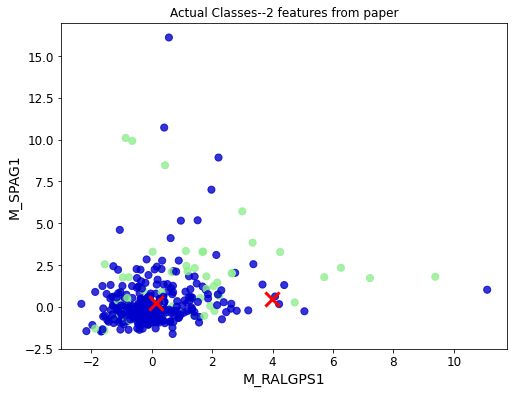

In [13]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_RALGPS1'], y=X['M_SPAG1'], s=50,
            c=y.astype('category'), 
            cmap = customcmap, alpha = 0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_RALGPS1', fontsize=14)
ax.set_ylabel(r'M_SPAG1', fontsize=14)
plt.title('Actual Classes--2 features from paper')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

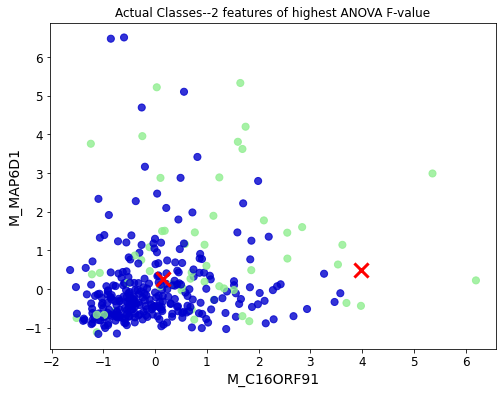

In [15]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_C16ORF91'], y=X['M_MAP6D1'], s=50,
            c=y.astype('category'), 
            cmap = customcmap, alpha = 0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_C16ORF91', fontsize=14)
ax.set_ylabel(r'M_MAP6D1', fontsize=14)
plt.title('Actual Classes--2 features of highest ANOVA F-value')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
# Save the figure as a PNG file
fig.savefig('Actual Classes.png')

A larger distance between centroids indicates better classification power. Therefore, using the 2 values with the highest ANOVA F-value better distinguish two labels, as we expected.

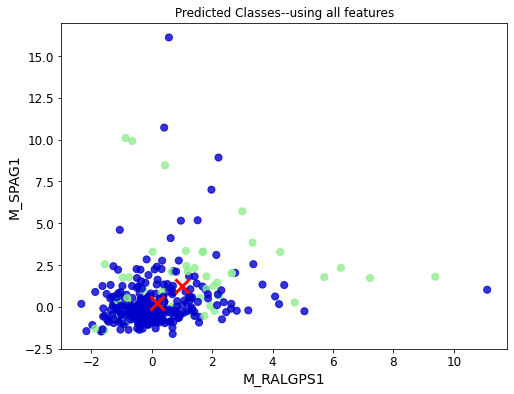

In [35]:
customcmap = ListedColormap(["lightgreen", "mediumblue"])
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=X['M_RALGPS1'], y=X['M_SPAG1'], s=50,
            c=y.astype('category'), 
            cmap = customcmap, alpha = 0.8)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')
ax.set_xlabel(r'M_RALGPS1', fontsize=14)
ax.set_ylabel(r'M_SPAG1', fontsize=14)
plt.title('Predicted Classes--using all features')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

As shown by the graph, models that used all features could not classify metastasis and local cancer good.